In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [34]:
USAhousing = pd.read_csv('dataset/USA_Housing.csv')
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

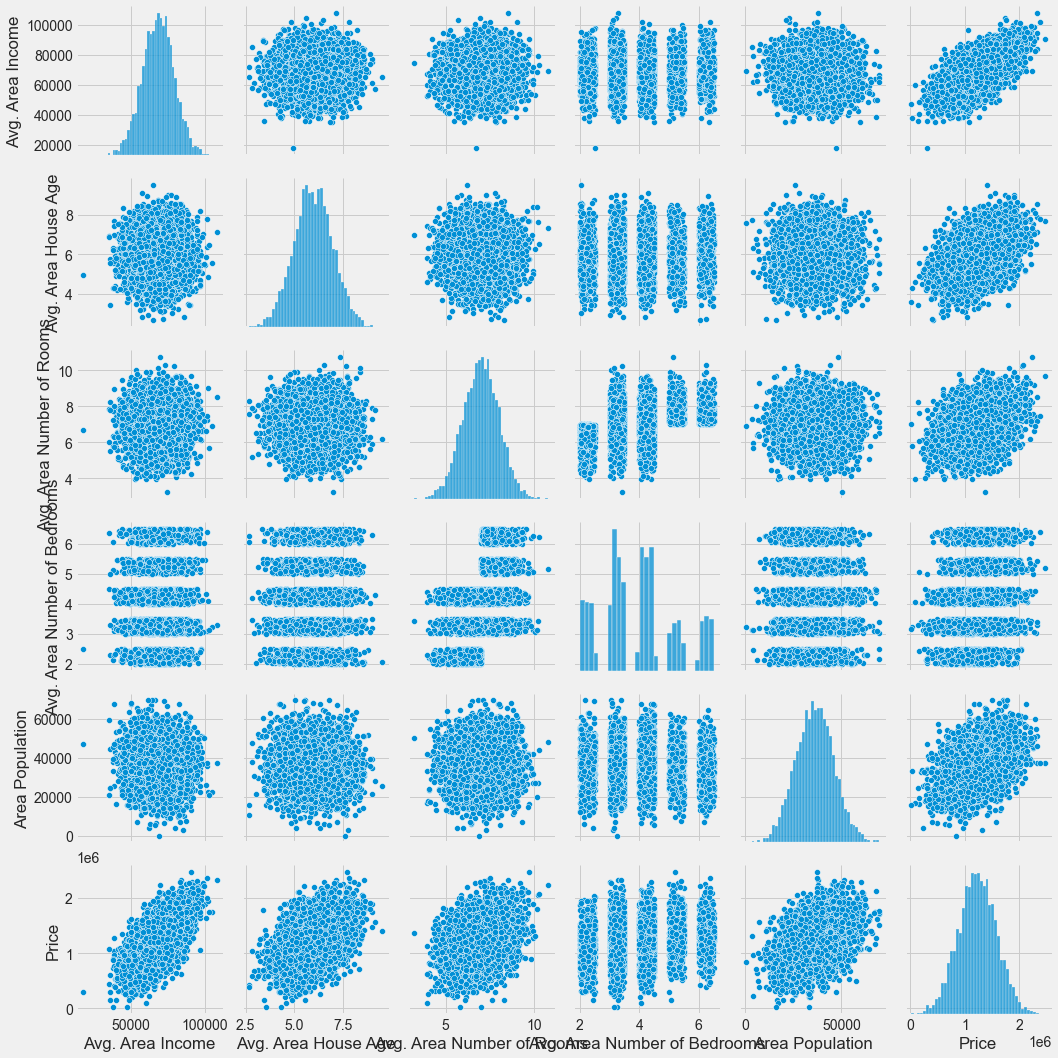

In [6]:
sns.pairplot(USAhousing)

D:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

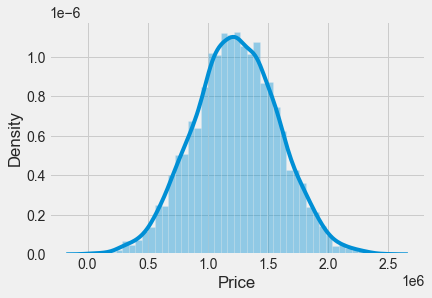

In [7]:
sns.distplot(USAhousing['Price'])

<AxesSubplot:>

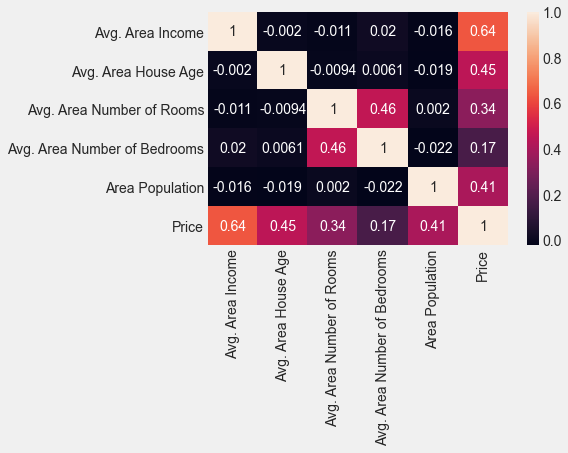

In [8]:
sns.heatmap(USAhousing.corr(), annot=True)

In [9]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = metrics.r2_score(true, predicted)
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2 Square: ', r2_square)
    print('---------------------------------------------')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train, y_train)

LinearRegression(normalize=True)

In [14]:
print(lin_reg.intercept_)

1228219.1492415662


In [15]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,232679.724643
Avg. Area House Age,163841.046593
Avg. Area Number of Rooms,121110.555478
Avg. Area Number of Bedrooms,2892.815119
Area Population,151252.342377


In [16]:
pred = lin_reg.predict(X_test)

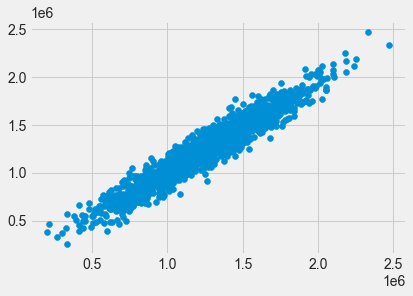

In [17]:
plt.scatter(y_test, pred)

D:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

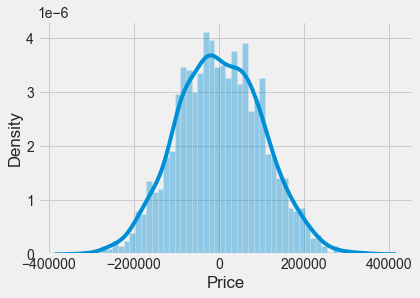

In [18]:
sns.distplot((y_test - pred), bins=50)

In [19]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evalutation:\n_____________________________________________')
print_evaluate(y_test, test_pred)

print('Train set evalutation:\n_____________________________________________')
print_evaluate(y_train, train_pred)

Test set evalutation:
_____________________________________________
MAE:  81135.56609336878
MSE:  10068422551.40088
RMSE:  100341.52954485436
R2 Square:  0.9146818498754016
---------------------------------------------
Train set evalutation:
_____________________________________________
MAE:  81480.4997317489
MSE:  10287043161.197224
RMSE:  101425.06180031257
R2 Square:  0.9192986579075526
---------------------------------------------


In [20]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred), cross_val(LinearRegression())]], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379


In [21]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE:  84406.20805764632
MSE:  11007453192.962639
RMSE:  104916.410503613
R2 Square:  0.9067246592788253
---------------------------------------------
Train set evaluation:
_____________________________________
MAE:  84869.33106844548
MSE:  11220750343.269632
RMSE:  105928.04323345935
R2 Square:  0.911973771491325
---------------------------------------------


In [22]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,84406.208058,1.100745e+10,104916.410504,0.906725,0.911230


In [23]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE:  81428.64835535336
MSE:  10153269900.892614
RMSE:  100763.43533689497
R2 Square:  0.9139628674464606
---------------------------------------------
Train set evaluation:
_____________________________________
MAE:  81972.39058585512
MSE:  10382929615.143461
RMSE:  101896.66145239235
R2 Square:  0.9185464334441484
---------------------------------------------


In [24]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,84406.208058,1.100745e+10,104916.410504,0.906725,0.911230
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379


In [25]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE:  81135.6985172622
MSE:  10068453390.364523
RMSE:  100341.68321472648
R2 Square:  0.914681588551116
---------------------------------------------
Train set evaluation:
_____________________________________
MAE:  81480.63002185506
MSE:  10287043196.634295
RMSE:  101425.0619750084
R2 Square:  0.9192986576295505
---------------------------------------------


In [26]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,84406.208058,1.100745e+10,104916.410504,0.906725,0.911230
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379


In [27]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE:  81184.43147330945
MSE:  10078050168.470106
RMSE:  100389.49232100991
R2 Square:  0.9146002670381437
---------------------------------------------
Train set evaluation:
_____________________________________
MAE:  81577.88831531756
MSE:  10299274948.101461
RMSE:  101485.34351373829
R2 Square:  0.9192027001474953
---------------------------------------------


In [28]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,84406.208058,1.100745e+10,104916.410504,0.906725,0.911230
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
4,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545


In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE:  81174.51844119698
MSE:  10081983997.620703
RMSE:  100409.0832426066
R2 Square:  0.9145669324195059
---------------------------------------------
Train set evaluation:
_____________________________________
MAE:  81363.0618562117
MSE:  10266487151.007814
RMSE:  101323.67517519198
R2 Square:  0.9194599187853729
---------------------------------------------


In [30]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,84406.208058,1.100745e+10,104916.410504,0.906725,0.911230
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
4,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
5,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000


In [31]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE:  81135.5687514772
MSE:  10068423175.412884
RMSE:  100341.53265429467
R2 Square:  0.9146818445876269
---------------------------------------------
Train set evaluation:
_____________________________________
MAE:  81480.50021401141
MSE:  10287043161.220964
RMSE:  101425.0618004296
R2 Square:  0.9192986579073663
---------------------------------------------


In [32]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
1,Robust Regression,84406.208058,1.100745e+10,104916.410504,0.906725,0.911230
2,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
3,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
4,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
5,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
6,Stochastic Gradient Descent,81135.568751,1.006842e+10,100341.532654,0.914682,0.000000
